# Asthma Data Acquisition
This notebook contains the code for reading in the ...

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Load the data

In [2]:
asthma_hospitalizations_df = pd.read_csv('../data_raw/inpatient_asthma_raw.csv')

In [3]:
def parse_brfss_survey_output(filepath):
    """
    This function takes in a filepath of the BRFSS raw exported data, which comes in messy csv format, and parses it line by line into a dataframe with all of the corresponding data

    Args:
    - filepath (the path to the raw data .csv)

    Returns:
    - processed_df (the line-by-line processed data)

    """

    # Loop through the .csv files with the messy curvey data and extract the relevant info
    with open(filepath, 'r') as file:
        raw_input_lines = file.readlines()

        #Instantiate empty list to hold data as we load it in and first iterations of year and asthma status
        output_list = []
        year = None
        asthma_status = "No"

        #Loop through all of the lines
        for input_line in raw_input_lines:
            
            #Extract the full line
            full_line = input_line.strip().replace('"', '').split(',')
            
            #Extract year if the line starts with a year
            if "Year" in full_line[0]:
                year = full_line[0].strip().split(" ")[-1]

            #Determine if the line contains relevant data
            
            elif len(full_line) > 1 and full_line[1] in ["n", "N", "%", "CI"]:

                #Extract full line
                full_line = input_line.strip().replace('"', '').split(',')
                #print(full_line)

                #Extract asthma status
                if full_line[1] == "n":
                    asthma_status = full_line[0]

                #Create a dict for this row of data to store in the df
                row_dict = {}
                row_dict['Year'] = year
                row_dict['Asthma'] = asthma_status
                row_dict['Metric'] = full_line[1]

                #Convert directly to a float for n, N, and %
                row_dict['Smoking-No'] = float(full_line[3]) if full_line[1] in ["n", "N", "%"] else full_line[3]
                row_dict['Smoking-Yes'] = float(full_line[4]) if full_line[1] in ["n", "N", "%"] else full_line[3]
                row_dict['Total'] = float(full_line[5]) if full_line[1] in ["n", "N", "%"] else full_line[3]

                output_list.append(row_dict)
        
        processed_df = pd.DataFrame(output_list)

    return processed_df

In [4]:
processed_2000_df = parse_brfss_survey_output("../data_raw/oklahoma_brfss_2000_raw.csv")
processed_2003_2010_df = parse_brfss_survey_output("../data_raw/oklahoma_brfss_2003-2010_raw.csv")
processed_2011_2023_df = parse_brfss_survey_output("../data_raw/oklahoma_brfss_2011-2023_raw.csv")

processed_survey_df = pd.concat([processed_2000_df, processed_2003_2010_df, processed_2011_2023_df], ignore_index=True)


## Preliminary EDA

Text(0.5, 1.0, 'Hospitalizations with an Asthma Discharge in Cleveland County, OK, from 2002-2022')

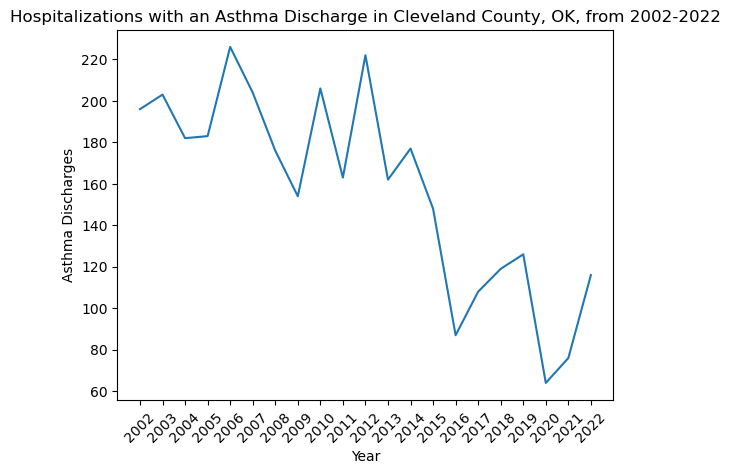

In [5]:
plt.plot(asthma_hospitalizations_df['Year'].astype(str), asthma_hospitalizations_df["Discharges"])
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Asthma Discharges')
plt.title('Hospitalizations with an Asthma Discharge in Cleveland County, OK, from 2002-2022')

Text(0.5, 1.0, 'Survey Respondants with Asthma in Central Oklahoma, from 2000, 2003-2023')

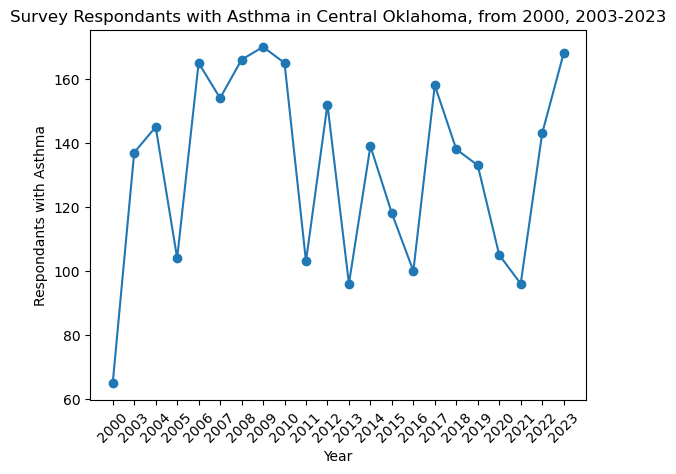

In [6]:
asthma_survey_filtered_n_df = processed_survey_df[(processed_survey_df["Asthma"] == "Yes") & (processed_survey_df["Metric"] == "n")]

plt.plot(asthma_survey_filtered_n_df['Year'].astype(str), asthma_survey_filtered_n_df["Total"], marker='o')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Respondants with Asthma')
plt.title('Survey Respondants with Asthma in Central Oklahoma, from 2000, 2003-2023')


C:\Users\ajnet\AppData\Local\Temp\ipykernel_23028\2367531871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asthma_survey_filtered_perc_df.rename(columns={'Total':'Total_Respondants'}, inplace=True)


Text(0.5, 1.0, 'Percentage of Survey Respondants with Asthma in Central Oklahoma, from 2000, 2003-2023')

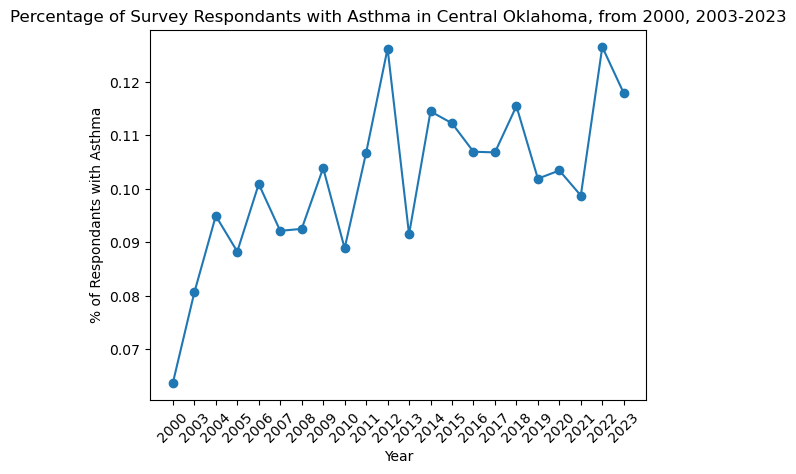

In [7]:

asthma_survey_filtered_perc_df = processed_survey_df[(processed_survey_df["Asthma"].isin(["Yes", "Total"])) & (processed_survey_df["Metric"] == "n")]#.drop(processed_survey_df.columns[-1], axis=1)
asthma_survey_filtered_perc_df.rename(columns={'Total':'Total_Respondants'}, inplace=True)
asthma_survey_filtered_perc_pivoted_df = asthma_survey_filtered_perc_df.pivot_table(index='Year', columns='Asthma', values='Total_Respondants', aggfunc='sum')
asthma_survey_filtered_perc_pivoted_df['Percentage'] = asthma_survey_filtered_perc_pivoted_df['Yes']/asthma_survey_filtered_perc_pivoted_df['Total']


plt.plot(asthma_survey_filtered_perc_pivoted_df["Percentage"], marker='o')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('% of Respondants with Asthma')
plt.title('Percentage of Survey Respondants with Asthma in Central Oklahoma, from 2000, 2003-2023')

In [8]:
asthma_survey_filtered_perc_pivoted_df.to_csv("../data_clean/asthma_survey_cleaned.csv")

## Smoking Preliminary EDA

Text(0.5, 1.0, 'Percentage of Respondants who Smoke in Central Oklahoma, from 2000, 2003-2023')

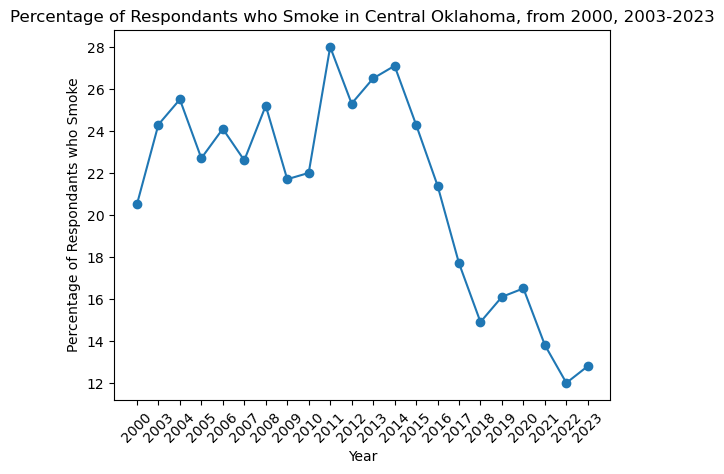

In [14]:
smoking_survey_filtered_df = processed_survey_df[(processed_survey_df["Asthma"] == "Total") & (processed_survey_df["Metric"] == "%")][["Year", "Smoking-Yes"]]

plt.plot(smoking_survey_filtered_df['Year'].astype(str), smoking_survey_filtered_df["Smoking-Yes"], marker='o')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Percentage of Respondants who Smoke')
plt.title('Percentage of Respondants who Smoke in Central Oklahoma, from 2000, 2003-2023')

In [13]:
smoking_survey_filtered_df.to_csv("../data_clean/smoking_survey_cleaned.csv")

C:\Users\ajnet\AppData\Local\Temp\ipykernel_23028\1152876558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_smoking_asthma_survey_filtered_perc_df.rename(columns={'Total':'Total_Respondants'}, inplace=True)


Text(0.5, 1.0, 'Percentage of Non-Smokers with Asthma in Central Oklahoma, from 2000, 2003-2023')

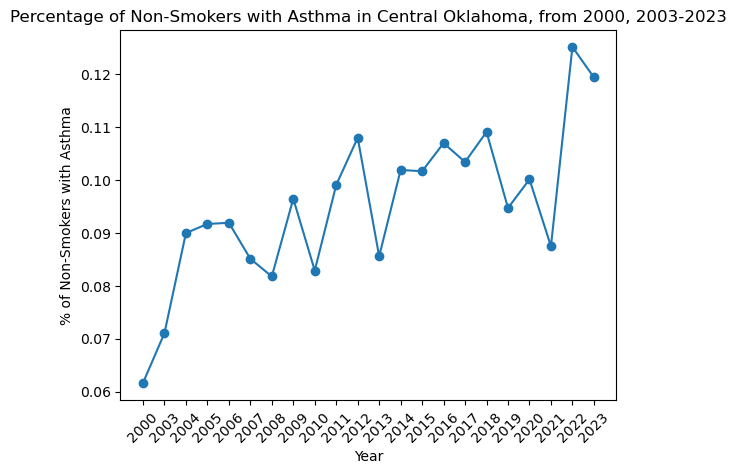

In [22]:
non_smoking_asthma_survey_filtered_perc_df = processed_survey_df[(processed_survey_df["Asthma"].isin(["Yes", "Total"])) & (processed_survey_df["Metric"] == "n")]#.drop(processed_survey_df.columns[-1], axis=1)
non_smoking_asthma_survey_filtered_perc_df.rename(columns={'Total':'Total_Respondants'}, inplace=True)

non_smoking_asthma_survey_filtered_perc_pivoted_df = non_smoking_asthma_survey_filtered_perc_df.pivot_table(index='Year', columns='Asthma', values='Smoking-No', aggfunc='sum')
non_smoking_asthma_survey_filtered_perc_pivoted_df['Percentage'] = non_smoking_asthma_survey_filtered_perc_pivoted_df['Yes']/non_smoking_asthma_survey_filtered_perc_pivoted_df['Total']


plt.plot(non_smoking_asthma_survey_filtered_perc_pivoted_df["Percentage"], marker='o')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('% of Non-Smokers with Asthma')
plt.title('Percentage of Non-Smokers with Asthma in Central Oklahoma, from 2000, 2003-2023')

In [24]:
non_smoking_asthma_survey_filtered_perc_pivoted_df.to_csv("../data_clean/asthma_non-smoker_survey_cleaned.csv")

C:\Users\ajnet\AppData\Local\Temp\ipykernel_23028\4275898940.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smoking_asthma_survey_filtered_perc_df.rename(columns={'Total':'Total_Respondants'}, inplace=True)


Text(0.5, 1.0, 'Percentage of Smokers with Asthma in Central Oklahoma, from 2000, 2003-2023')

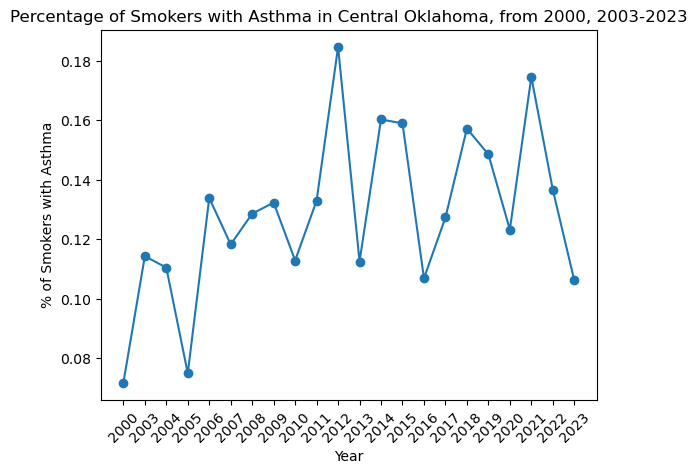

In [23]:
smoking_asthma_survey_filtered_perc_df = processed_survey_df[(processed_survey_df["Asthma"].isin(["Yes", "Total"])) & (processed_survey_df["Metric"] == "n")]#.drop(processed_survey_df.columns[-1], axis=1)
smoking_asthma_survey_filtered_perc_df.rename(columns={'Total':'Total_Respondants'}, inplace=True)

smoking_asthma_survey_filtered_perc_pivoted_df = smoking_asthma_survey_filtered_perc_df.pivot_table(index='Year', columns='Asthma', values='Smoking-Yes', aggfunc='sum')
smoking_asthma_survey_filtered_perc_pivoted_df['Percentage'] = smoking_asthma_survey_filtered_perc_pivoted_df['Yes']/smoking_asthma_survey_filtered_perc_pivoted_df['Total']


plt.plot(smoking_asthma_survey_filtered_perc_pivoted_df["Percentage"], marker='o')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('% of Smokers with Asthma')
plt.title('Percentage of Smokers with Asthma in Central Oklahoma, from 2000, 2003-2023')

## Asthma Percentage with stratified smoking status

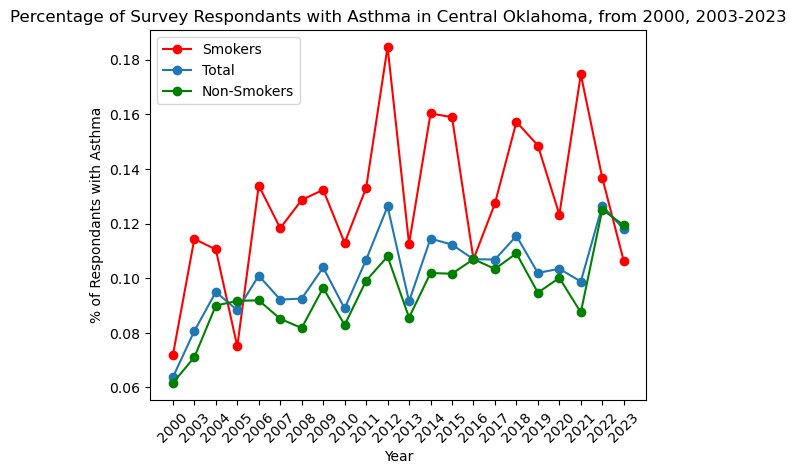

In [25]:
plt.plot(smoking_asthma_survey_filtered_perc_pivoted_df["Percentage"], marker='o', label='Smokers', color = 'r')
plt.plot(asthma_survey_filtered_perc_pivoted_df["Percentage"], marker='o', label = "Total")
plt.plot(non_smoking_asthma_survey_filtered_perc_pivoted_df["Percentage"], marker='o', label = "Non-Smokers", color = 'g')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('% of Respondants with Asthma')
plt.title('Percentage of Survey Respondants with Asthma in Central Oklahoma, from 2000, 2003-2023')
plt.legend()